# Visualisation Demo

This notebook demonstrates how to use the plotting helpers in `fairness.visualisation`
to visualize metrics from `fairness.metrics` and `fairness.single_metrics`.


In [1]:
from sklearn.linear_model import LogisticRegression

from fairness.data import load_heart_csv
from fairness.preprocess import add_age_group, preprocess_tabular, \
                                make_train_test_split
from fairness.groups import make_eval_df
from fairness.adapters import unpack_eval_df, make_subject_labels_dict
from fairness import metrics
from fairness import visualisation as vis

In [2]:
# Load and prepare data
df = load_heart_csv("../data/heart.csv")
df = add_age_group(df)

# Prepare ML features (drop the derived protected column from training)
df_model = preprocess_tabular(df, drop_cols=("age_group",))
split = make_train_test_split(df_model, target_col="HeartDisease")

# Train a simple model
model = LogisticRegression(max_iter=5000)
model.fit(split.X_train, split.y_train)
y_pred = model.predict(split.X_test)

In [3]:
# Build an evaluation DataFrame with intersectional labels
eval_df = make_eval_df(
    df_test=df.loc[split.X_test.index],
    protected=["Sex", "age_group"],
    y_pred=y_pred,
    y_true=split.y_test,
)

subject_labels, predictions, true_statuses = unpack_eval_df(eval_df)
subject_labels_dict = make_subject_labels_dict(
    df.loc[split.X_test.index],
    ["Sex", "age_group"],
)

## Group-level metrics
Plot group metrics such as accuracy or false negative rate across intersectional groups.


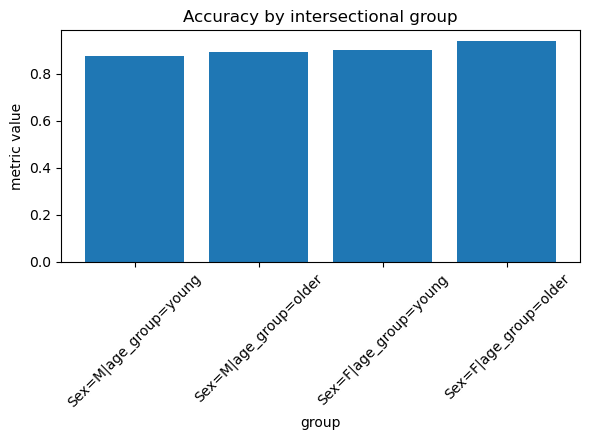

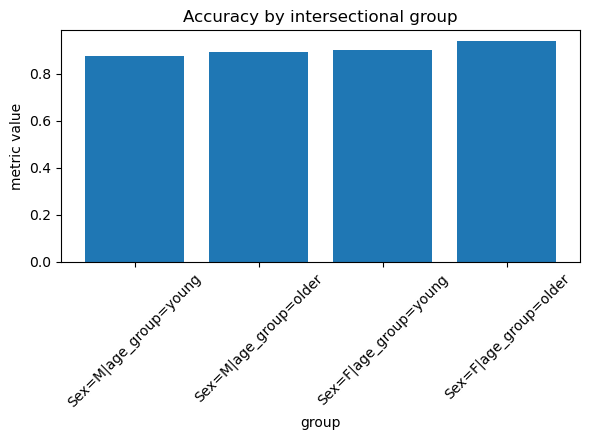

In [4]:
vis.plot_group_metric(
    metrics.group_acc,
    subject_labels,
    predictions,
    true_statuses,
    title="Accuracy by intersectional group",
    sort=True,
)

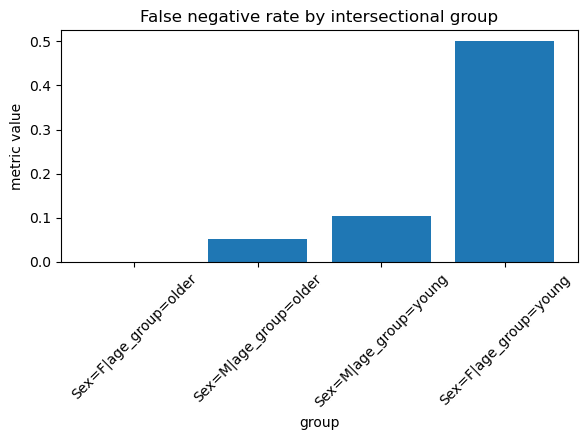

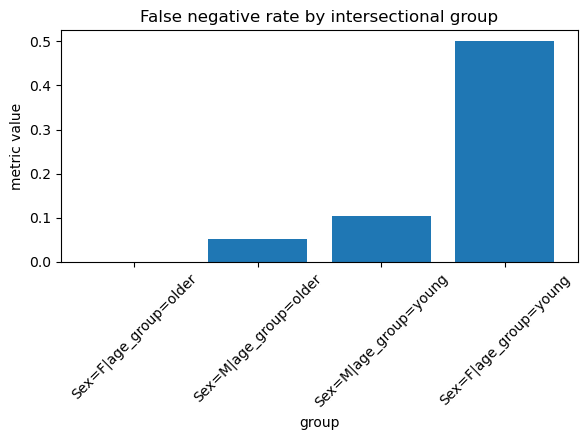

In [5]:
vis.plot_group_metric(
    metrics.group_fnr,
    subject_labels,
    predictions,
    true_statuses,
    title="False negative rate by intersectional group",
    sort=True,
)

## Pairwise group metrics
Visualize metrics that compare pairs of groups (e.g., accuracy difference).


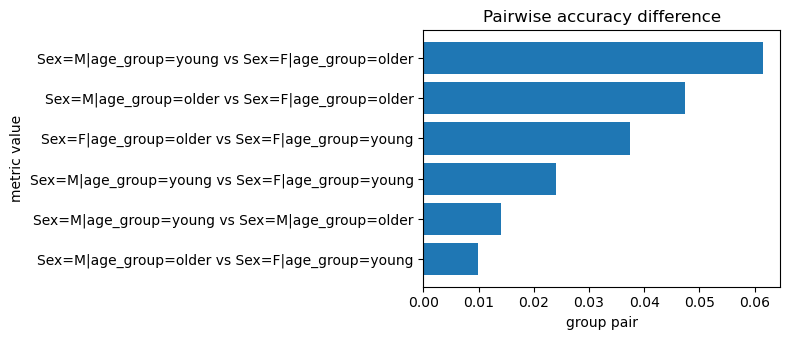

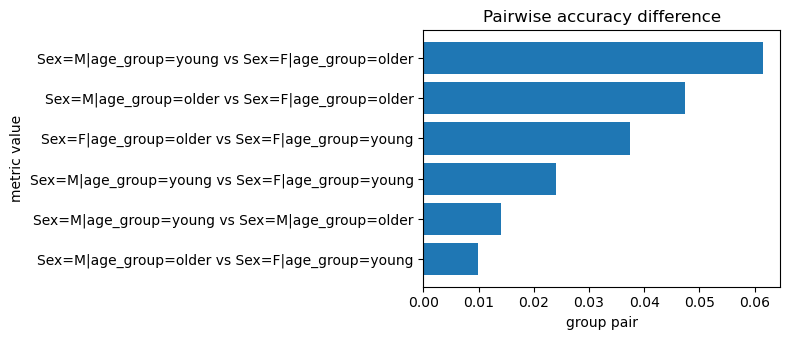

In [6]:
vis.plot_pairwise_group_metric(
    metrics.group_acc_diff,
    subject_labels,
    predictions,
    true_statuses,
    title="Pairwise accuracy difference",
)

## Intersectional metrics (all groups)
Plot outputs from all_intersect_* functions as horizontal bars.


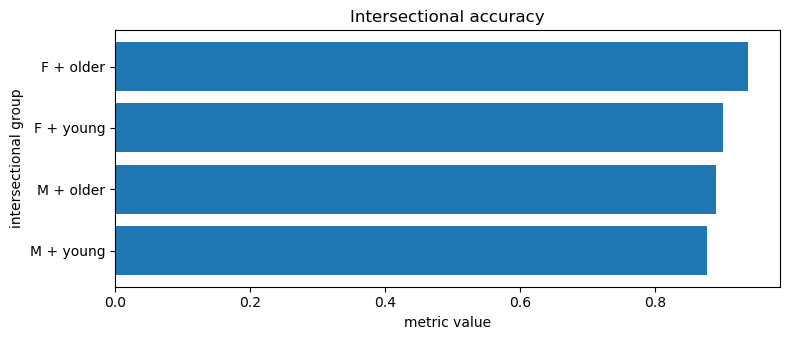

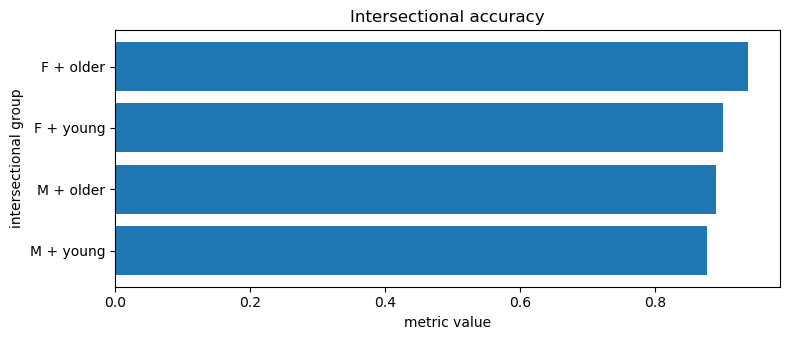

In [7]:
vis.plot_intersectional_metric(
    metrics.all_intersect_accs,
    subject_labels_dict,
    predictions,
    true_statuses,
    title="Intersectional accuracy",
)

## Scalar metrics
Plot a set of scalar summaries such as max intersectional disparity.


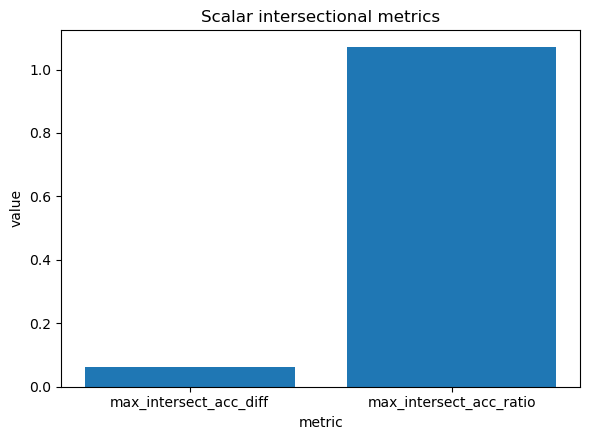

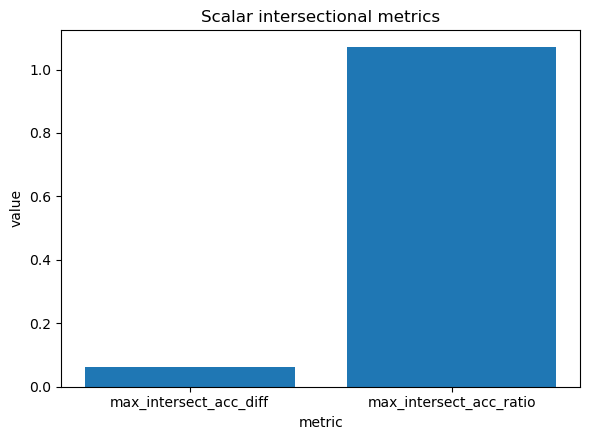

In [8]:
scalar_metrics = {
    "max_intersect_acc_diff": metrics.max_intersect_acc_diff(
        subject_labels_dict, predictions, true_statuses
    ),
    "max_intersect_acc_ratio": metrics.max_intersect_acc_ratio(
        subject_labels_dict, predictions, true_statuses, natural_log=False
    ),
}
vis.plot_scalar_metrics(scalar_metrics, title="Scalar intersectional metrics")

## Single-attribute fairness metrics
Use `fairness.single_metrics` via the convenience plotter.


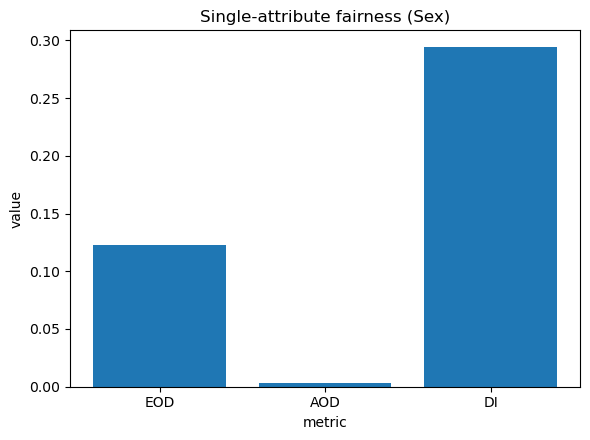

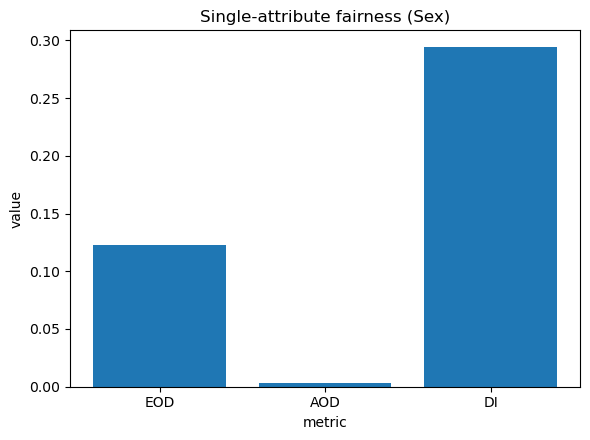

In [9]:
vis.plot_single_metrics(
    y_test=split.y_test,
    y_pred=y_pred,
    group_labels=df.loc[split.X_test.index, "Sex"],
    privileged_label="M",
    title="Single-attribute fairness (Sex)",
)